In [1]:
import sys
sys.path.append("/Users/abowkis/Documents/code/cmblensplus/wrap")
import basic

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb

from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.0.4 installed at /global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/camb


In [2]:
cpmodel = 'modelw'
kn = 2000

In [3]:
#In this block we use CAMB to get the matter power spectrum.

#get matter power spectra and sigma8 at redshift 0
pars = camb.CAMBparams()

if cpmodel == 'modelw':
    pars.set_cosmology(H0=70., ombh2=0.046*.7**2, omch2=0.233*.7**2)
    pars.InitPower.set_params(ns=0.97,As=2.25e-9)
elif cpmodel == 'model0':
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
    pars.InitPower.set_params(ns=0.965)

#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.], kmax=100)

#Linear spectra
#z here is the redshift that we want to calculate the matter power spectrum at.
#pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=50, npoints = kn)
s8 = np.array(results.get_sigma8())
print('sigma8:',s8)

#Non-Linear spectra (Halofit)
#pars.NonLinear = model.NonLinear_both
#results.calc_power_spectra(pars)
#kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = kn)


sigma8: [0.82018208]


In [4]:
#D = '/global/homes/t/toshiyan/Work/Ongoing/bispec/data/'
#k, pk0 = np.loadtxt( D+cpmodel+'/Pk/Pklin.dat', unpack=True )

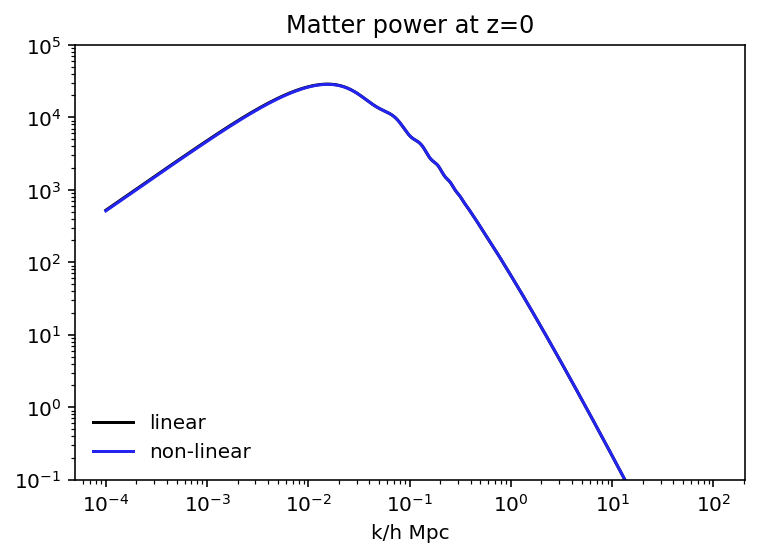

In [6]:
plt.ylim(1e-1,1e5)
plt.loglog(kh, pk[0,:], color='k')
#plt.loglog(k, pk0)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=0');

In [7]:
zmin = 1e-4
#zmax = 40
zmax = 1100
zn = 1000
#zn = 50

#The source is the cmb, set all three same redshift.
zs = np.array([1100,1100,1100], dtype = np.double)

print(zs)
lmin = 2
lmax = 2000

ell = np.arange(lmin,lmax+1)

ell_factor = ell**2

zed,dz = basic.bispec.zpoints(zmin,zmax,zn)

[1100. 1100. 1100.]


In [8]:
bl_LSS_GM_equi,bl_PB_GM_equi=basic.bispec.bispeclens('equi', cpmodel, 'GM', zed, dz,zs,lmin,lmax,kh,pk[0,:])
#bl_LSS_GM_equi,bl_PB_GM_equi=basic.bispec.bispeclens('equi', cpmodel, 'GM', zed, dz,zs,lmin,lmax,k,pk0)
#Note must pass the linear matter power spectrum to this bispectrum calculator.

#cl = basic.bispec.cl_flat('model0',zed,dz,zs,lmax,kh,pk[0,:])
#Test function bispec.cl_flat can't get working.

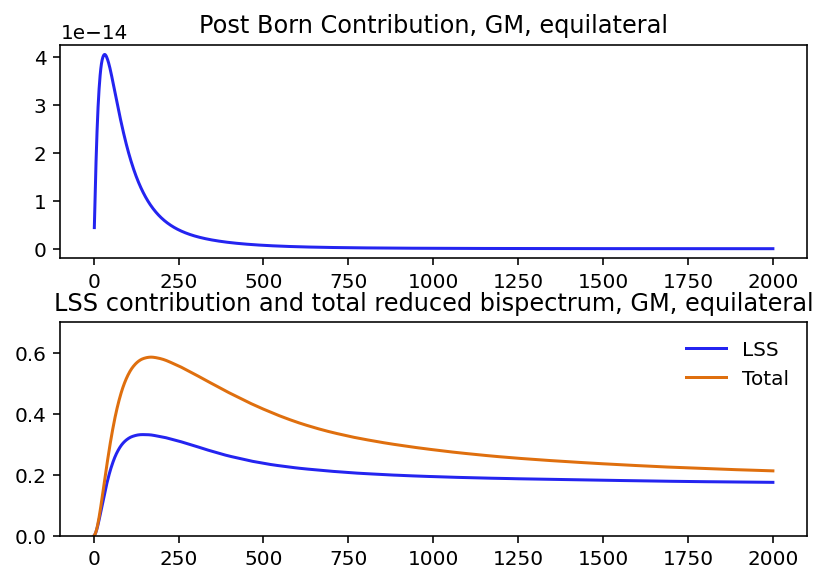

In [9]:
#np.shape(bl_LSS_GM_equi)
#print(np.shape(bl_LSS_GM_equi))
#print(bl_LSS_GM_equi, 'space', bl_PB_GM_equi)

fig, axs = plt.subplots(2)
fig.tight_layout()
axs[0].plot(ell,bl_PB_GM_equi)
axs[0].set_title('Post Born Contribution, GM, equilateral')

axs[1].plot(ell,1e9*ell_factor * bl_LSS_GM_equi, label = 'LSS')
axs[1].set_title('LSS contribution and total reduced bispectrum, GM, equilateral')

axs[1].plot(ell,1e9*ell_factor*(bl_LSS_GM_equi+bl_PB_GM_equi), label = "Total")
axs[1].set_ylim(0,0.7)
#Note that to plot with l^2 factor use ell_factor to multiply bl_PB_GM_equi etc. in above (see cell 5).

plt.legend()

#Note here the divergence from expected behaviour around l = 1000. 
# Similar behaviour for all plots... why??

In [10]:
bl_LSS_GM_fold,bl_PB_GM_fold=basic.bispec.bispeclens('fold', 'modelw', 'GM', zed, dz,zs,lmin,lmax,kh,pk[0,:])

In [11]:
bl_LSS_GM_sque,bl_PB_GM_sque=basic.bispec.bispeclens('sque', 'modelw', 'GM', zed, dz,zs,lmin,lmax,kh,pk[0,:])

In [12]:
bl_LSS_GM_isos,bl_PB_GM_isos=basic.bispec.bispeclens('isos', 'modelw', 'GM', zed, dz,zs,lmin,lmax,kh,pk[0,:])

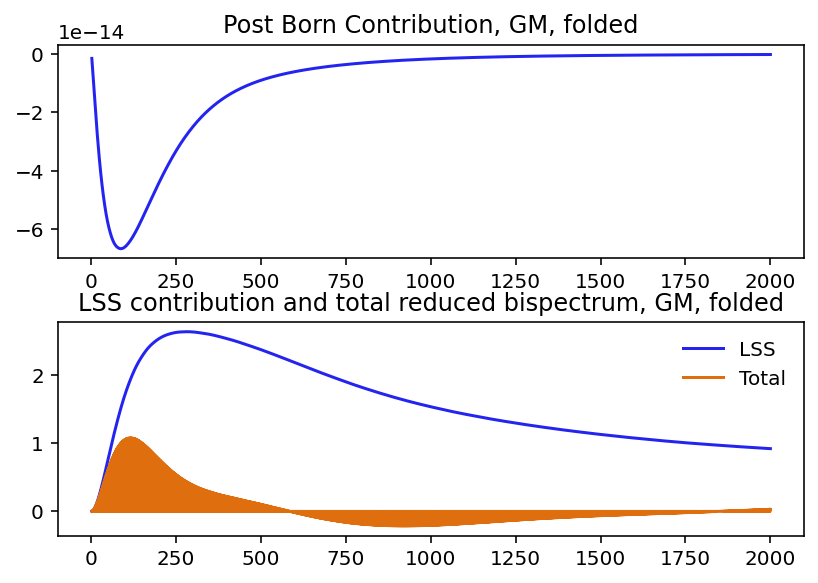

In [13]:
fold_ell_factor = ell[bl_LSS_GM_fold!=0]**2

fig, axs = plt.subplots(2)
fig.tight_layout()
axs[0].plot(ell[bl_PB_GM_fold!=0],bl_PB_GM_fold[bl_PB_GM_fold!=0])
axs[0].set_title('Post Born Contribution, GM, folded')

axs[1].plot(ell[bl_LSS_GM_fold!=0],1e9*fold_ell_factor*bl_LSS_GM_fold[bl_LSS_GM_fold!=0], label = 'LSS')
axs[1].set_title('LSS contribution and total reduced bispectrum, GM, folded')

axs[1].plot(ell,1e9*ell_factor*(bl_LSS_GM_fold+bl_PB_GM_fold), label = 'Total')
plt.legend()
#Plots the non zero values of bl.

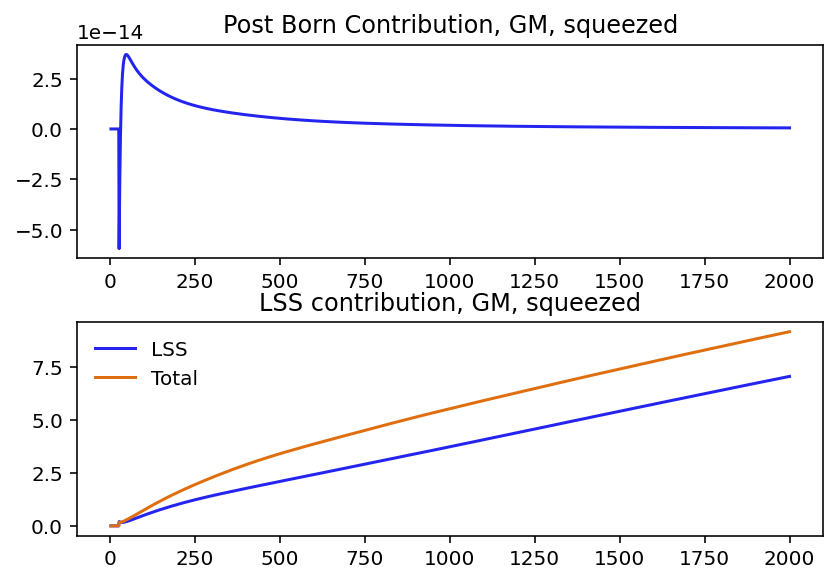

In [14]:
fig, axs = plt.subplots(2)
fig.tight_layout()
axs[0].plot(ell,bl_PB_GM_sque)
axs[0].set_title('Post Born Contribution, GM, squeezed')

axs[1].plot(ell,1e9*ell_factor*bl_LSS_GM_sque, label = 'LSS')
axs[1].set_title('LSS contribution, GM, squeezed')

axs[1].plot(ell,1e9*ell_factor*(bl_LSS_GM_sque+bl_PB_GM_sque), label = 'Total')
plt.legend()

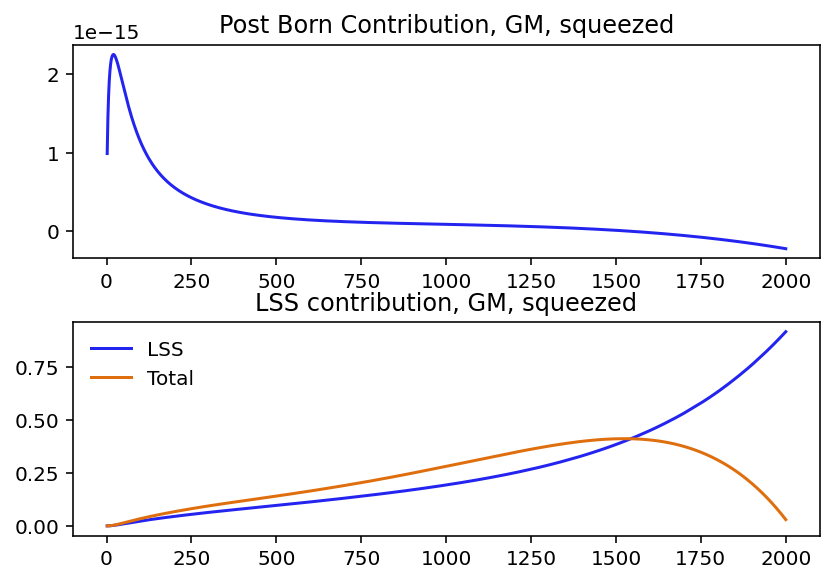

In [15]:
fig, axs = plt.subplots(2)
fig.tight_layout()
axs[0].plot(ell,bl_PB_GM_isos)
axs[0].set_title('Post Born Contribution, GM, squeezed')

axs[1].plot(ell,1e9*ell_factor*bl_LSS_GM_isos, label = 'LSS')
axs[1].set_title('LSS contribution, GM, squeezed')

axs[1].plot(ell,1e9*ell_factor*(bl_LSS_GM_isos+bl_PB_GM_isos), label = 'Total')
plt.legend()